**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#**PART 1**:  Simple Linear Regression - Manual Calculation
In this project, you will perform a manual calculation of the coefficients used in a simple linear regression model for a given dataset.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.

-  **Step 1**:  For the input parameters (dataset) given in the cell below, create a scatter plot of Glucose level (y parameter) vs. Age (x parameter).
-  **Step 2**:  Calculate the coefficients for a simple linear regression model using the following equations:  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  

$$\hat y = b_0+b_1x_1$$  
$$b_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2}
$$  
$$b_0=\bar y-b_1\bar x$$  

-  **Step 3**:  Create a scatter plot of the input dataset and generated regression line on the same plot.
-  **Step 4**:  Calculate the performance using R-squared using sklearn r2_score function (you may use the sklearn library for this step).
-  **Step 5**:  Confirm your calculated coefficients and R-squared performance metric using the embedded doctest module.  Record your regression equation - you will need to upload this to the accompanying assignment.
-  **Step 6**:  Reflect on the performance of your model.  What does the R-squared parameter tell you about the properties of this dataset and your simple linear prediction?  For example, is age a good predictor of glucose level?  You will answer this question in the accompanying assignment.

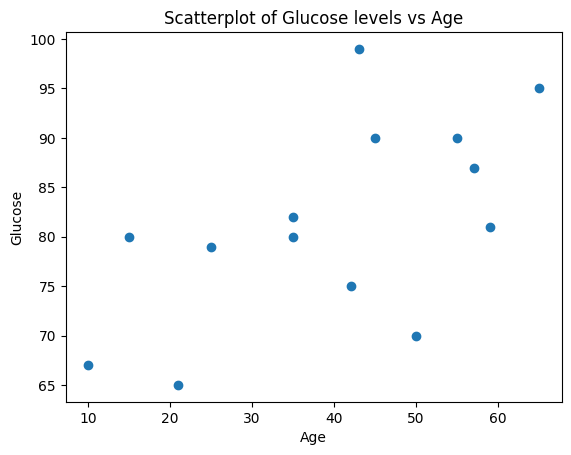

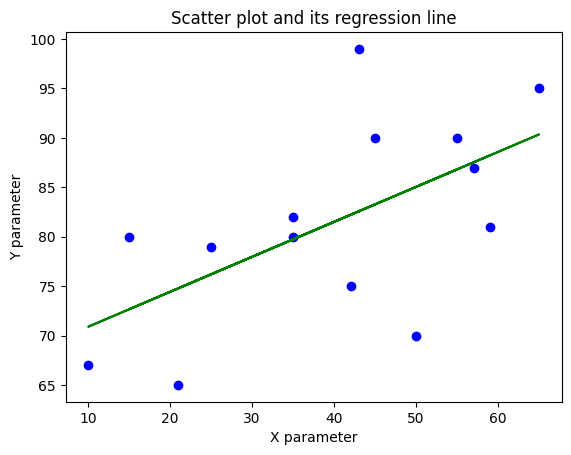


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



TestResults(failed=0, attempted=3)

In [37]:
#Simple Linear Regression - Manual Calculation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])

X = Age
Y = Glucose

#Step 1:  Create a scatter plot of Glucose level (y parameter) vs. Age (x parameter).
#         Your plot must include x and y labels.
# YOUR CODE HERE...
plt.scatter(Age, Glucose)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Scatterplot of Glucose levels vs Age')
plt.show()

#Step 2:  Create a function which MANALLY (using the equations) calculates the
#         coefficients for a simple linear regression model.
#         Your function must input numpy arrays for the x and y variables and return b0 and b1.
#         Your function MUST use equations shown in the text cell above.
#         (NOTE - you may not use a model API for this step, calculate the parameters use the equations above).
def simpleLRcoeffsManual(X, Y):
  Xmean = np.mean(X)
  Ymean = np.mean(Y)
  b1 = np.sum((X - Xmean)*(Y - Ymean))/np.sum((X- Xmean)**2)
  b0 = Ymean - b1 * Xmean

  return b0, b1
# return the tuple b0, b1 in this order
# YOUR CODE HERE...


#Step 3:  Create a scatter plot of the input dataset and generated regression line (yhat = x*b1 + b0) on the same plot.
# YOUR CODE HERE...
b0, b1 = simpleLRcoeffsManual(X, Y)
yhat = X * b1 + b0
plt.scatter(X, Y, color = 'blue', label = 'input dataset')
plt.plot(X, yhat, color = 'green', label = 'generated regression line')
plt.title('Scatter plot and its regression line')
plt.xlabel('X parameter')
plt.ylabel('Y parameter')
plt.show()
#Step 4:  Create a function which calculates the performance using R-squared using sklearn r2_score function.
#         Your function input parameters are y (actual values) and y_hat (predicted).
#         Your function returns the R-squared value
#         Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def simpleLRscore(y, yhat):
  r_squared = r2_score(y, yhat)
  return r_squared


#Step 5:  Run the doctest module.  DO NOT modify any code below this line!
import doctest
"""
  >>> print('b1:', round(simpleLRcoeffsManual(Age, Glucose)[1], 3))
  b1: 0.354
  >>> print('b0:', round(simpleLRcoeffsManual(Age, Glucose)[0], 3))
  b0: 67.348
  >>> print('r2:', round(simpleLRscore(Glucose, yhat), 3))
  r2: 0.357
"""

doctest.testmod()

#**PART 2**:  Simple Linear Regression using Scikit learn

In this project, you will experiment with the functions used to train a simple linear regression model using the Scikit learn library.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Calculate the coefficients for a simple linear regression model using the appropriate sklearn functions (see the code below for hints).
-  **Step 2**:  Create a scatter plot of the input dataset and generated regression line on the same plot.
-  **Step 3**:  Calculate the performance using R-squared using sklearn r2_score function.
-  **Step 4**:  Run the cell and confirm the coefficients and R-squared using the embedded doctest module.  
-  **Step 5**:  Reflect on the performance of your model.  Confirm your outputs are the same as from Part 1, are they the same and should they be the same?


TestResults(failed=0, attempted=3)

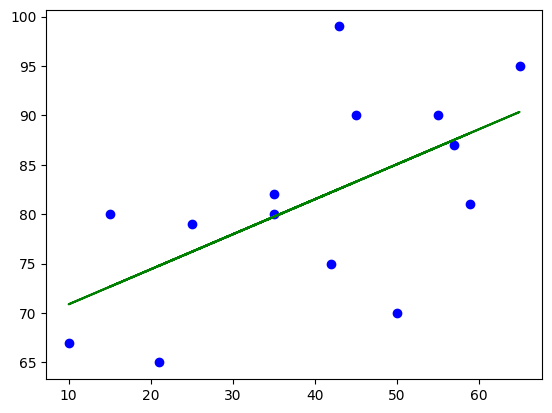

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])
AgeReshaped = Age.T.reshape(-1,1)   #T=transpose, -1=unknown rows, 1=col
GlucoseReshaped = Glucose.T.reshape(-1,1)


X = AgeReshaped
Y = GlucoseReshaped


#Step 2:  Create a function which calculates the coefficients for a simple linear regression model
#         Your function must input numpy arrays for the x and y variables and return coefficients b0,b1, and Yhat (predicted output).
#         Your function MUST use the sklearn functions.
#         Hint: Construct a linear regression object, then "fit" the data:
#             https://scikit-learn.org/0.18/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
#             https://scikit-learn.org/0.18/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#
#
def simpleLRcoeffsSkLearn(X, Y):
  lobject = LinearRegression()
  lobject.fit(X, Y)
  b0 = lobject.intercept_  # Intercept (b0)
  b1 = lobject.coef_  # Slope (b1)
  Yhat = lobject.predict(X)  # Predicted values (Yhat)
  return b1, b0, Yhat

#Return the tuple: b1, b0, Yhat in this order
#Note - you must return your outputs in the order above in order to pass the doctest module.
# YOUR CODE HERE...


#Step 3:  Create a scatter plot of the input dataset and generated regression line on the same plot.
#         Hint: make sure you transpose and reshape yhat.  (yhat.T.reshape(-1,1))
# YOUR CODE HERE...
yhatreshaped = yhat.T.reshape(-1,1)
plt.scatter(X, Y, color='blue', label = 'input dataset')
plt.plot(X, yhatreshaped, color = 'green', label = 'regression line')
#Step 4:  Calculate the performance using R-squared using sklearn r2_score function.
def simpleLRscoreSkLearn(y, yhat):
  r_squared = r2_score(y, yhat)
  return r_squared


#Step 5:  Run the doctest module.  DO NOT modify any code below this line!

import doctest
"""
  >>> print('b1:', simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[0][0])
  b1: [0.35391241]
  >>> print('b0:', simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[1][0])
  b0: 67.34791357165692
  >>> print('r2:', simpleLRscoreSkLearn(GlucoseReshaped, simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[2]))
  r2: 0.35733001480762194
"""

doctest.testmod()

#**PART 3**: Multiple Linear Regression Class
In this project, you will create a class with a 'from-scratch' implementation of multiple linear regression You will create a generic function to train your model using gradient descent to minimize the cost for varying number of independent variables and a single dependent variable, then make predictions, and score the result.  

Please reference the video lectures on Gradient Descent, and Multiple Linear Regression for a description of the main functions you will need in the implementation.
Please complete the steps outlined below.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.

You will create a Multiple Linear Regression Python class, called MLR which includes the following methods:
-  *normalize_dataset()*
-  *fit()*
-  *predict()*
-  *score()*

Recall from Gradient Descent, we can use the MSE (Mean Squared Error) as our cost function then compute the partial derivatives with respect to each of the coefficients.  We will do the same here, but in a more generic form to support 'n' independent variables.  Here we expand the cost function for multiple independent variables and 'm' examples:

$$MSE = \frac{1}{m}\sum(y - \widehat y)^2 = \frac{1}{m}\sum(y - (b_0+b_1x_1+b_2x_2+...+b_nx_n))^2$$  
The gradients of each coefficient are defined as the partial derivatives of the cost function with respect to each of the coefficients.  

 $$\frac{\partial(MSE)}{\partial(b_0)} = \frac{1}{m}\sum 2(y-(b_0+b_1x_1+...+b_nx_n))(-1) = -\frac{2}{m}\sum(y-\widehat y) $$

 $$\frac{\partial(MSE)}{\partial(b_1)} = \frac{1}{m}\sum 2(y-(b_0+b_1x_1+...+b_nx_n))(-x_1) = -\frac{2}{m}\sum((y-\widehat y)*x_1) = -\frac{2}{m}(y-\widehat y)\cdot X_1 $$

 $$\frac{\partial(MSE)}{\partial(b_2)} = \frac{1}{m}\sum 2(y-(b_0+b_1x_1+...+b_nx_n))(-x_2) = -\frac{2}{m}\sum((y-\widehat y)*x_2) = -\frac{2}{m}(y-\widehat y)\cdot X_2 $$
            <center>**. . .** </center>
            
 $$\frac{\partial(MSE)}{\partial(b_1)} = \frac{1}{n}\sum 2(y-(b_0+b_1x_1+...+b_nx_n))(-x_m) = -\frac{2}{n}\sum((y-\widehat y)*x_m) = -\frac{2}{n}(y-\widehat y)\cdot X_m $$  

where the '*' represents an element by element multiply of the vectors, and the '$\cdot$' represents the dot product.   

Note that the $b_0$ coefficient is computed slightly different from the remaining coefficients in that all but the $b_0$ coefficient contains its corresponding independent variable term.

Read in the dataset into Pandas dataframe.  Create a numpy array X by extracting the appropriate column data for the following cases:
-  Case 1:  Interest_Rate, Stock_Index_Price
-  Case 2:  Interest_Rate, Unemployment_Rate, Stock_Index_Price  
-  Case 3:  Interest_Rate, GDP, Stock_Index_Price  
-  Case 4:  Interest_Rate, Unemployment_Rate, GDP, Stock_Index_Price  
Note, we include the dependent variable 'Stock_Index_Price' in the X as we'll use it in the training function.  
Create a numpy array y with the independent variable: Stock_Index_Price.  

**Step 1**:   
Write the class constructor:
>>      def __init__(self, data):
>>      Inputs:
>>              data: includes X (indep variables), y (dep variable)
>>      Instance variables:
>>              self.X, self.y:  assign to None (will update later)
>>              self.coeffs: initialze to random values via numpy random function.

**Step 2**:  
Write a function to normalize the numpy arrays created in Step 1.  
      Normalizes your X and y numpy arrays using the following formulas.   
      
$$\frac{X - X_{min}}{X_{max} - X_{min}} \ \ ,\ \ \frac{y - y_{min}}{y_{max} - y_{min}}$$
>>     def normalize_dataset():
>>     Inputs:  none
>>     Outputs: self.X, self.y (for test purposes)
>>     Normalize and update self.X, self.y instance variables

**Step 3**:  
Write a function that trains (fits) the model, implementing gradient descent to minimize the cost function, where the cost function is Mean Squared Error as defined above.  
>>     def fit(self, lr, iterations):  
>>     Inputs:  
              lr: learning rate  
              iterations:  number of iterations (epochs) to run the algo  
>>     Outputs: Returns coeff, MSE (in this order)  
>>     Instance variables:
       self.X:  normalized independent variable values where:  
           x1 is formatted in the first column of the X numpy array  
           x2 is formatted in the second column of the X numpy array  
           xn is formatted in the nth column of the X numpy array  
           y is formmatted in the last column of the X numpy array  
       self.y:  dataset normalized dependent variable values  
           Note, assume that y is contained in the last column of the X array  
                 AND separately as self.y from Step 2  
       self.coeffs:  The trained (updated, fit) coefficients

**Step 4**:  
Write a function runs the prediction or 'forward' step with the trained coefficients.

>>     def predict (self, X_test):  
>>     Inputs:  X_test:  input test array to predict yhat from
>>     Outputs: Returns yhat: the predicted outputs
>>     Instance variables: self.coeffs:  Trained coeffs

**Step 5**:  
Write a function to generate a prediction score on the algorithm.

>>     def score (self, yhat):
>>     Inputs:  yhat: predicted outputs
>>     Outputs: Returns score: the performance score
>>     Instance variables: self.y: Known (truth) labels
>>        Note, you may use the sklearn R2 score function here

In [39]:
#Multiple Linear Regression Class

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np


class MLR():

  #Step 1:  Write the class constructor
  #         Inputs: dataset indep and dep variables
  #         Set the X and y instance variables to None (will update later)
  #         Initialize coeffs instance variable to numpy random.random values.
  #             (random seed will be set prior to calling constructor for test)
  #         Note, assume data contains the y labels in the last column
  def __init__(self, data):
    self.data = data
    self.X = None       #leave uninitialized, will update later
    self.y = None       #leave uninitialized, will update later
    np.random.seed(0)
    self.coeffs = np.random.random(size=data.shape[1])
    print('constructor coeffs:', self.coeffs)



  #Step 2:  Write a function to normalize the input numpy arrays
  #         Inputs: none
  #         Outputs: none
  #         Update self.X and self.y using:
  #         (X - Xmin)/(Xmax - Xmin) and y = (y - ymin)/(ymax - ymin)
  def normalize_dataset(self):
    minmax = []
    for i in range(len(self.data[0])):
      col_values = [row[i] for row in self.data]
      value_min = min(col_values)
      value_max = max(col_values)
      minmax.append((value_min, value_max))
    for row in self.data:
      for i in range(len(row)):
        row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

    #Extract X data
    self.X = np.array(self.data[:, :-1])

    #Extract last column y labels
    self.y = np.array(self.data[:, -1])

    return self.X, self.y


  #Step 3:  Write a function that trains (fits) the model from scratch using
  #         Gradient Descent to minimize the cost functions for each of the
  #         trainable parameters (coeffs).
  #         Inputs:  learning rate, number of iterations to run the algo
  #         Outputs: Return self.coeffs, MSE
  #         Use MSE as the cost function.
  #         Note, assume self.X, self.y have been preprocessed (normalized).
  def fit(self, lr, iterations):
    # Create a numpy array to store the gradients for each of the coeffs (b0, b1, ... bn)
    # where size = number of indep vars (columns) in the X data + 1 (+1 for b0)
    # Hint: use the numpy shape function and access the columns index
      grad_b = np.zeros(self.X.shape[1] + 1)
      print('Initial gradient:', grad_b)

    # Create an empty numpy array to store the MSE
      MSE_arr = np.empty(iterations)

    # Loop over 'iterations'
      for i in range(iterations):

    #   Init yhat = b0
        yhat = self.coeffs[0]

    #   Loop over number of indep vars in X
    #   Hint: use the numpy shape function and access the columns index
        for j in range(self.X.shape[1]):
    #     Update yhat = b0 + b1*x1 + b2x2 + ... bnxn
    #     Do this for all rows in x1, x2, etc.
    #     Hint:  use numpy array slicing for x to include all rows
          yhat += self.coeffs[j + 1] * self.X[:, j]

    #   Compute MSE per the equation in the notes
    #   Note, make the 1/m term generic, based on the number of samples in X
    #   Hint: use numpy 'sum' to sum all the squared error terms
        MSE = (1/len(self.y)) * np.sum((yhat- self.y)**2)

    #   Append MSE to MSE_arr
        MSE_arr[i] = MSE

    #   Compute the gradient of b0 per the equation in the notes
    #   Note, we cannot do this in a loop since it excludes any indep variable
        grad_b[0] = (1 / len(self.y)) * np.sum(yhat - self.y)

    #   Loop over number of coefficients (i.e. b1, b2, ..., bn)
        for i in range(self.X.shape[1]):
    #     Compute the gradient of b1, b2, ... bn per the equation in the notes
          grad_b[i+1] = (2 / len(self.y)) * np.sum((yhat - self.y) * self.X[:, i])

        print('Gradient:', grad_b)

    #   Update the coefficients where each coeff = old coeff - lr*(grad for that coeff)
    #   Hint: Loop over number of indep vars in X+1 (+1 for b0)
        for j in range(len(self.coeffs)):
          self.coeffs[j] -= lr * grad_b[j]

      return self.coeffs, MSE_arr


  #Step 4:  Write a function that runs the prediction (forward) step.
  #         Inputs:  Array of test independent values.
  #         Outputs:  Return the predicted output, yhat.
  #         Use the trained coefficients, self.coeffs
  def predict(self, X_test):
    yhat = np.zeros(X_test.shape[0])

    if X_test.ndim == 1:
        X_test = X_test.reshape(1, -1)

    if X_test.shape[1] > self.X.shape[1]:
        X_test = X_test[:, :-1]

    for i in range(X_test.shape[1]):
        yhat += self.coeffs[i + 1] * X_test[:, i]

    yhat += self.coeffs[0]

    return yhat


  #Step 5:  Write a function that generates a prediction score on the algorithm
  #         Inputs: Predicted values
  #         Outputs: R2 score
  #         Note, you ay use the sklearn function
  def score(self, yhat):
    score = r2_score(self.y, yhat)

    return score



In [40]:
#Test Cell - DO NOT CHANGE

Stock_Market = {'Year':[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,\
                         2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,\
                         2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],\
                'Month':[12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1],\
                'Interest_Rate':[2.73, 2.7,  2.63, 2.4,  2.37, 2.77, 2.53, 2.23, 2.67, 2.6,  2.43, 2.2,  2.5,  2.47,\
                                 2.03, 2.33, 2.3,  2.57, 2.27, 2.1,  2.,   2.13, 2.07, 2.17, 1.87, 1.73, 1.67, 1.97,\
                                 1.93, 1.9,  1.83, 1.8,  1.77, 1.6,  1.7,  1.63],\
                'Unemployment_Rate':[5.8,  5.75, 5.68, 5.65, 5.63, 5.62, 5.72, 5.83, 5.78, 5.73, 5.7,  5.6,  6.08, 5.67,\
                                     5.97, 5.95, 5.88, 5.87, 5.85, 5.82, 5.77, 5.98, 5.93, 5.92, 5.9,  6.07, 6.05, 6.,\
                                     6.03, 6.02, 6.15, 6.18, 6.17, 6.12, 6.13, 6.1],\
                'GDP':[22.2, 20.6, 21.7, 19.7, 22.1, 19.5, 18.7, 22.,  21.6, 19.4, 21.9, 21.8,\
                       21.5, 21.2, 21.1, 21.,  20.5, 21.4, 20.9, 20.4, 20.,  20.8, 20.3, 20.1,\
                       19.8, 19.6, 20.2, 19.3, 20.7, 18.9, 21.3, 19.2, 19.,  18.8, 19.9, 19.1],\
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1230,1195,1175,1167,1159,\
                                      1147,1130,1075,1071,1065,1058,1051,1049,1043, 984, 976, 971,\
                                       968, 965, 958, 949, 943, 922, 884, 876, 866, 822, 719, 704]
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','GDP','Stock_Index_Price'])
epochs = 5000
lr = 0.01

Xy_test1 = df[['Interest_Rate','Stock_Index_Price']].to_numpy()
Xy_test2 = df[['Interest_Rate','Unemployment_Rate','Stock_Index_Price']].to_numpy()
Xy_test3 = df[['Interest_Rate','GDP','Stock_Index_Price']].to_numpy()
Xy_test4 = df[['Interest_Rate','Unemployment_Rate', 'GDP', 'Stock_Index_Price']].to_numpy()


#Test case 1
np.random.seed(0)
mlr = MLR(Xy_test1)
X, y = mlr.normalize_dataset()
coef1, MSE1 = mlr.fit(lr, epochs)
yhat = mlr.predict(Xy_test1)
score1 = mlr.score(yhat)
#print('Score Case 1:', score1)
#print('Start, Stop MSE:', MSE1[0], MSE1[epochs-1])

#Test case 2
np.random.seed(0)
mlr = MLR(Xy_test2)
X, y = mlr.normalize_dataset()
coef2, MSE2 = mlr.fit(lr, epochs)
yhat = mlr.predict(Xy_test2)
score2 = mlr.score(yhat)
#print('Score Case 2:', score2)
#print('Start, Stop MSE:', MSE2[0], MSE2[epochs-1])

#Test case 3
np.random.seed(0)
mlr = MLR(Xy_test3)
X, y = mlr.normalize_dataset()
coef3, MSE3 = mlr.fit(lr, epochs)
yhat = mlr.predict(Xy_test3)
score3 = mlr.score(yhat)
#print('Score Case 3:', score3)
#print('Start, Stop MSE:', MSE3[0], MSE3[epochs-1])

#Test case 4
np.random.seed(0)
mlr = MLR(Xy_test4)
X, y = mlr.normalize_dataset()
coef4, MSE4 = mlr.fit(lr, epochs)
yhat = mlr.predict(Xy_test4)
score4 = mlr.score(yhat)
#print('Score Case 4:', score4)
#print('Start, Stop MSE:', MSE4[0], MSE4[epochs-1])

import doctest

'''
  >>> print('Score Case 1:', np.round(score1, 3))
  Score Case 1: 0.776
  >>> print('Start, Stop MSE:', np.round(MSE1[0], 3), np.round(MSE1[epochs-1], 3))
  Start, Stop MSE: 0.196 0.012
  >>> print('Score Case 2:', np.round(score2, 3))
  Score Case 2: 0.811
  >>> print('Start, Stop MSE:', np.round(MSE2[0], 3), np.round(MSE2[epochs-1], 3))
  Start, Stop MSE: 0.589 0.01
  >>> print('Score Case 3:', np.round(score3, 3))
  Score Case 3: 0.789
  >>> print('Start, Stop MSE:', np.round(MSE3[0], 3), np.round(MSE3[epochs-1], 3))
  Start, Stop MSE: 0.571 0.011
  >>> print('Score Case 4:', np.round(score4, 3))
  Score Case 4: 0.823
  >>> print('Start, Stop MSE:', np.round(MSE4[0], 3), np.round(MSE4[epochs-1], 3))
  Start, Stop MSE: 1.059 0.009

'''


doctest.testmod()


Streaming output truncated to the last 5000 lines.
Gradient: [0.59955981 0.55070935 0.68678026 0.61289146]
Gradient: [0.58430042 0.53493783 0.67138234 0.59656015]
Gradient: [0.56943134 0.51957617 0.65637168 0.58065066]
Gradient: [0.55494257 0.50461386 0.64173837 0.56515217]
Gradient: [0.54082437 0.49004063 0.62747277 0.55005413]
Gradient: [0.52706724 0.47584649 0.61356548 0.53534626]
Gradient: [0.51366193 0.4620217  0.60000734 0.52101855]
Gradient: [0.50059941 0.44855677 0.58678942 0.50706124]
Gradient: [0.48787091 0.43544246 0.57390302 0.49346481]
Gradient: [0.47546786 0.42266976 0.56133968 0.48022002]
Gradient: [0.46338192 0.4102299  0.54909113 0.46731782]
Gradient: [0.45160497 0.39811432 0.53714934 0.45474943]
Gradient: [0.44012909 0.38631469 0.52550646 0.44250628]
Gradient: [0.42894657 0.37482289 0.51415485 0.43058001]
Gradient: [0.41804988 0.36363102 0.50308708 0.41896249]
Gradient: [0.4074317  0.35273136 0.49229589 0.4076458 ]
Gradient: [0.3970849  0.3421164  0.48177422 0.3966222

TestResults(failed=2, attempted=8)

#**PART 4**: Multiple Linear Regression

*   List item
*   List item


In this project, you will expand on the example provided in the lecture train a multiple linear regression model using Pandas and the Scikit learn library and determine which independent variables have the greatest effect on the model performance.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.  The Multiple Linear Regression equation is shown here for reference:  

$$\hat y = b_0+b_1x_1+b_2x_2=B^T\cdot X$$   

Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Input the Stock Market dataset into a Pandas dataframe.
-  **Step 2**:  Examine the relationship between the variables
-  **Step 3**:  Write a function which performs Multiple Linear Regression (MLR) on the input dataset.
-  **Step 4**:  Fit the regression model for ALL combinations of indep vars
-  **Step 5**:  Predict the stock index price using your top 2 models from the test cases shown in the code cell below (i.e. test your top 2 models with the best r2 scores).
-  **Step 6**: Record your regression equation - you will need to upload this to the accompanying assignment. Reflect on your results.  What combination of independent variables gave the best performing model?  Note that the more variable you use in your model, the more memory and processing resources you will need so does it make sense to use all of your independent variables if a subset is close in performance?


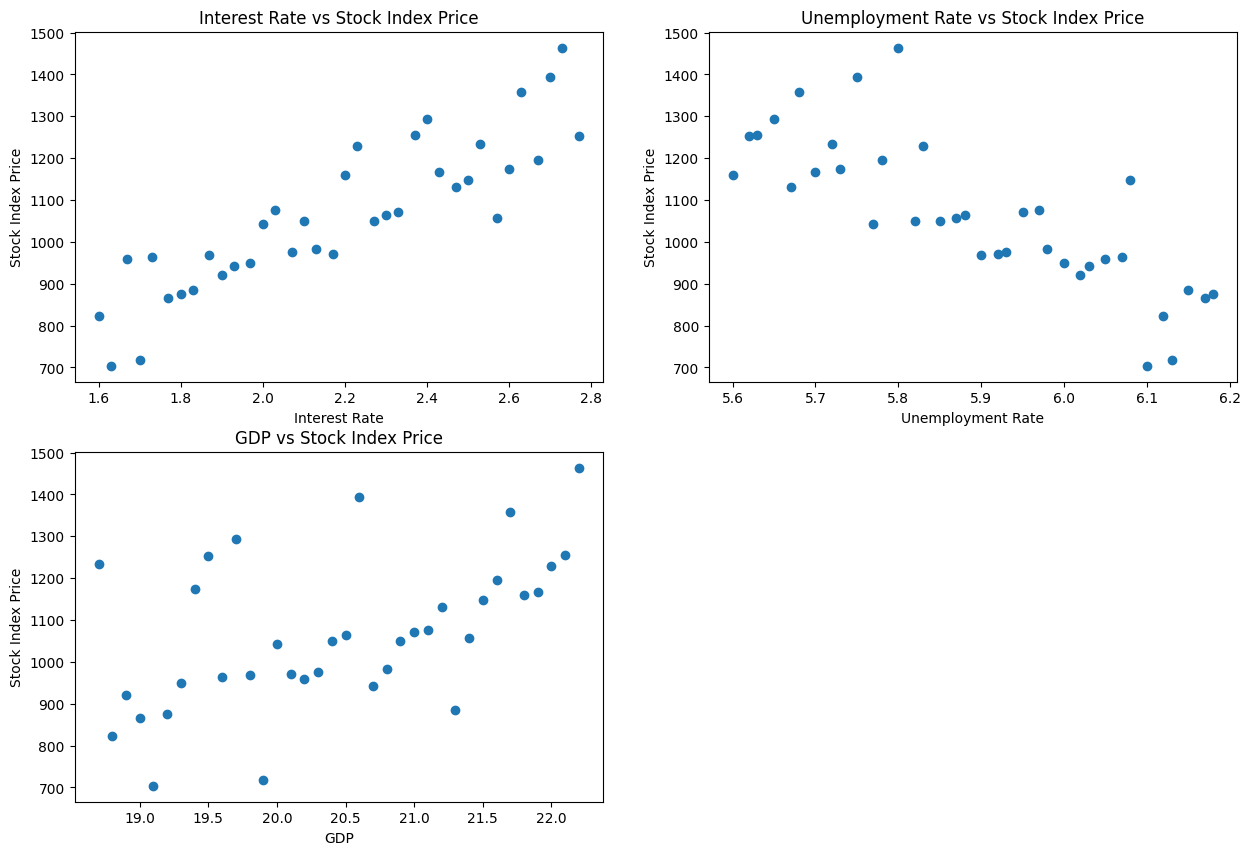

Case 1: Interest Rate only Intercept: 89.4963422539123 Coefficients: [447.22813841] score: 0.7761962416936845


Case 2: Unemployment Rate only Intercept: 5872.544739201681 Coefficients: [-815.83031877] score: 0.6446566846067017


Case 3: GDP only Intercept: -752.8159159159156 Coefficients: [88.93693694] score: 0.27607375430501235


Case 4:  Interest Rate + Unemployment Rate Intercept: 2197.7528706602884 Coefficients: [ 327.09060652 -313.31647815] score: 0.8152669168261492


Case 5: Interest Rate + GDP Intercept: -288.4747407568707 Coefficients: [415.47404803  21.87290205] score: 0.7889815680865808


Case 6: Unemployment Rate + GDP Intercept: 4425.8357558077205 Coefficients: [-716.66435407   42.17389607] score: 0.6972114266765551


Case 7: Interest Rate + Unemployment Rate + GDP Intercept: 1802.3978378130605 Coefficients: [ 299.610547   -307.27216408   20.52528504] score: 0.8265107950832802


Model 7, test case 1: [1408.29007322]
Model 4, test case 1: [1436.67470438]
Model 7, test case 

In [41]:
#Multiple Linear Regression
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

Stock_Market = {'Year':[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,\
                         2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,\
                         2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],\
                'Month':[12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1],\
                'Interest_Rate':[2.73, 2.7,  2.63, 2.4,  2.37, 2.77, 2.53, 2.23, 2.67, 2.6,  2.43, 2.2,  2.5,  2.47,\
                                 2.03, 2.33, 2.3,  2.57, 2.27, 2.1,  2.,   2.13, 2.07, 2.17, 1.87, 1.73, 1.67, 1.97,\
                                 1.93, 1.9,  1.83, 1.8,  1.77, 1.6,  1.7,  1.63],\
                'Unemployment_Rate':[5.8,  5.75, 5.68, 5.65, 5.63, 5.62, 5.72, 5.83, 5.78, 5.73, 5.7,  5.6,  6.08, 5.67,\
                                     5.97, 5.95, 5.88, 5.87, 5.85, 5.82, 5.77, 5.98, 5.93, 5.92, 5.9,  6.07, 6.05, 6.,\
                                     6.03, 6.02, 6.15, 6.18, 6.17, 6.12, 6.13, 6.1],\
                'GDP':[22.2, 20.6, 21.7, 19.7, 22.1, 19.5, 18.7, 22.,  21.6, 19.4, 21.9, 21.8,\
                       21.5, 21.2, 21.1, 21.,  20.5, 21.4, 20.9, 20.4, 20.,  20.8, 20.3, 20.1,\
                       19.8, 19.6, 20.2, 19.3, 20.7, 18.9, 21.3, 19.2, 19.,  18.8, 19.9, 19.1],\
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1230,1195,1175,1167,1159,\
                                      1147,1130,1075,1071,1065,1058,1051,1049,1043, 984, 976, 971,\
                                       968, 965, 958, 949, 943, 922, 884, 876, 866, 822, 719, 704]
                }

#Step 1:  Input the Stock Market dataset into a Pandas dataframe.
#         Print out a description of the data.
#         Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# YOUR CODE HERE...
dataframe = DataFrame(Stock_Market)
dataframe.describe()


#Step 2:  Examine the relationship between the variables
#         Plot each of the independent variables vs. Stock_Index_Price using Matplotlib
#         Which independent vars do you think will have the greatest impact on the dep variable?
# YOUR CODE HERE...
plt.figure(figsize=(15, 10))

# Plot Interest_Rate vs Stock_Index_Price
plt.subplot(2,2,1)
plt.scatter(dataframe['Interest_Rate'], dataframe['Stock_Index_Price'])
plt.title('Interest Rate vs Stock Index Price')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')

# Plot Unemployment_Rate vs Stock_Index_Price
plt.subplot(2,2,2)
plt.scatter(dataframe['Unemployment_Rate'], dataframe['Stock_Index_Price'])
plt.title('Unemployment Rate vs Stock Index Price')
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock Index Price')

# Plot GDP vs Stock_Index_Price
plt.subplot(2,2,3)
plt.scatter(dataframe['GDP'], dataframe['Stock_Index_Price'])
plt.title('GDP vs Stock Index Price')
plt.xlabel('GDP')
plt.ylabel('Stock Index Price')

plt.show()


#Step 3:  Write a function which performs Multiple Linear Regression (MLR) on the input dataset.
#         Use sklearn to perform the MLR and determine the intercept and coefficents.
#         Your function must input parameters X, Y for the indep variable and dependent variable respectively.
#         Your function must return the intercept, coefficients, and score in this exact order.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def MLR(X,Y):
  reg = LinearRegression().fit(X, Y)
  intercept = reg.intercept_
  coefficients = reg.coef_
  score = reg.score(X, Y)
  return intercept, coefficients, score
# YOUR CODE HERE...



#Step 4:  Fit the regression model for ALL combinations of indep vars
#         Call the function you created in Step 3.
#         Print out the intercept, coefficients and r2 score for each of the cases.
#         Hint:  Extract the X parameter from the dataframe.
#         Hint:  The Y parameter will be Stock_Index_Price for all cases.
#Case 1:  Interest Rate only
X = dataframe[['Interest_Rate']]
Y = dataframe['Stock_Index_Price']
intercept, coefficients, score = MLR(X, Y)
print("Case 1: Interest Rate only", "Intercept:", intercept, "Coefficients:", coefficients, "score:", score)
print("\n")
#Case 2:  Unemployment Rate only
X = dataframe[['Unemployment_Rate']]
Y = dataframe['Stock_Index_Price']
intercept, coefficients, score = MLR(X, Y)
print("Case 2: Unemployment Rate only","Intercept:", intercept, "Coefficients:", coefficients, "score:", score)
print("\n")
#Case 3:  GDP only
X = dataframe[['GDP']]
Y = dataframe['Stock_Index_Price']
intercept, coefficients, score = MLR(X, Y)
print("Case 3: GDP only","Intercept:", intercept, "Coefficients:", coefficients, "score:", score)
print("\n")
#Case 4:  Interest Rate + Unemployment Rate
X = dataframe[['Interest_Rate','Unemployment_Rate']]
Y = dataframe['Stock_Index_Price']
intercept, coefficients, score = MLR(X, Y)
print("Case 4:  Interest Rate + Unemployment Rate","Intercept:", intercept, "Coefficients:", coefficients, "score:", score)
print("\n")
#Case 5:  Interest Rate + GDP
X = dataframe[['Interest_Rate','GDP']]
Y = dataframe['Stock_Index_Price']
intercept, coefficients, score = MLR(X, Y)
print("Case 5: Interest Rate + GDP","Intercept:", intercept, "Coefficients:", coefficients, "score:", score)
print("\n")
#Case 6:  Unemployment Rate + GDP
X = dataframe[['Unemployment_Rate','GDP']]
Y = dataframe['Stock_Index_Price']
intercept, coefficients, score = MLR(X, Y)
print("Case 6: Unemployment Rate + GDP","Intercept:", intercept, "Coefficients:", coefficients, "score:", score)
print("\n")
#Case 7:  Interest Rate + Unemployment Rate + GDP
X = dataframe[['Interest_Rate','Unemployment_Rate','GDP']]
Y = dataframe['Stock_Index_Price']
intercept, coefficients, score = MLR(X, Y)
print("Case 7: Interest Rate + Unemployment Rate + GDP","Intercept:", intercept, "Coefficients:", coefficients, "score:", score)
print("\n")
# YOUR CODE HERE...


#Step 5:  Predict the stock index price using your top 2 models with the following test cases (i.e. the top 2 models with the best r2 scores):
#         You should regenerate your model in case it was overwritten in the previous step when testing the other conditions.
#         Set the values for each of the independent variables, then call the sklearn predict function.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Test case 1:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.75
#                       New_Unemployment_Rate = 5.3
#                       New_GDP = 20.0
X_7 = dataframe[['Interest_Rate', 'Unemployment_Rate', 'GDP']]
Y = dataframe['Stock_Index_Price']
model_7 = LinearRegression().fit(X_7, Y)
testcase_1_7 = DataFrame({
    'Interest_Rate': [2.75],
    'Unemployment_Rate': [5.3],
    'GDP': [20.0] })
predicted1_7 = model_7.predict(testcase_1_7)
print('Model 7, test case 1:', predicted1_7)

X_4 = dataframe[['Interest_Rate', 'Unemployment_Rate']]
Y = dataframe['Stock_Index_Price']
model_4 = LinearRegression().fit(X_4, Y)
testcase_1_4 = DataFrame({
    'Interest_Rate': [2.75],
    'Unemployment_Rate': [5.3]})
predicted1_4 = model_4.predict(testcase_1_4)
print('Model 4, test case 1:', predicted1_4)

#         Test case 2:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.9
#                       New_Unemployment_Rate = 5.9
#                       New_GDP = 21.0
testcase_2_7 = DataFrame({
    'Interest_Rate': [2.9],
    'Unemployment_Rate': [5.9],
    'GDP': [21.0] })
predicted2_7 = model_7.predict(testcase_2_7)
print('Model 7, test case 2:', predicted2_7)

X = dataframe[['Interest_Rate', 'Unemployment_Rate']]
Y = dataframe['Stock_Index_Price']
model_4 = LinearRegression().fit(X, Y)
testcase_2_4 = DataFrame({
    'Interest_Rate': [2.9],
    'Unemployment_Rate': [5.9]})
predicted2_4 = model_4.predict(testcase_2_4)
print('Model 4, test case 2:', predicted2_4)
# NOTE - **** if your model does not use all 3 of the parameters given in the test cases above, then just leave them out ****
# YOUR CODE HERE...


#**PART 4**:  Multiple Linear Regression using Actual Data
In this section you will continue the analysis from Part 3 but this time you will search and find ACTUAL data from 2018-2020 based on at least 4 of the following independent variables:
- **Unemployment:** *https\*://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm
- **Effective Federal Funds rate:**  https://fred.stlouisfed.org/series/FEDFUNDS (fedfunds.csv in downloads)
- **Average Temperature in NYC:**  https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf.  

and/or find some on your own, for example search for one of the following during the time period:
- Savings rate
- Personal income
- Average home price in NYC
- Inflation rate
- Birth rate
- Others? your choice as long as they are appropriate and relevant!

----- Procedure ------
- **Step 1**:  Find at least 3 ACTUAL datasets representing independent variables that might affect the stock index price between the years 2018-2020 (36 months total).  Your data should be in monthly increments.
- **Step 2**:  Input the data to your script.  Use Part 3 in this project as a guide.
- **Step 3**:  Examine the relationship between the variables.  If linear relationships exist, they should be a good candidate variable for your model.
- **Step 4**:  Fit the regression model for ALL combinations of indep vars.
- **Step 5**:  Predict the stock index price using your top 2 models with at least 2 test cases (you decide the independent variable values you would like to test with.
-  **Step 6**:  Record your regression equation - you will need to upload this to the accompanying assignment.  Reflect on your results.  What combination of independent variables gave the best performing model?  Did you find a subset of independent variables that performed well enough such that you don't need to consume the memory and processing required to include all of them?  



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Load NYC temperature data & lets change the nyc data ( monthly data into datewise so that we can easily do joins with other datasets based on date.)
nyc_temp = pd.read_csv('/content/drive/MyDrive/nyc_temperature.csv')

In [4]:
nyc_temp = nyc_temp.drop('ANNUAL',axis=1)

In [5]:
#melt the dataframe into long format
df_long = pd.melt(nyc_temp, id_vars=['YEAR'], var_name='Month', value_name='Temperature')

#map months to numbers
month_map = { 'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUN': '06', 'JUL': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'}

# Create the Date column
df_long['Date'] = df_long.apply(lambda row: f"{month_map[row['Month']]}/01/{int(row['YEAR'])}", axis=1)

# Drop unnecessary columns
df_long.drop(columns=['YEAR', 'Month'], inplace=True)

#Reorder columns
df_long = df_long[['Date', 'Temperature']]
print(df_long)
nyc_temp = df_long

            Date  Temperature
0     01/01/1869         35.1
1     01/01/1870         37.5
2     01/01/1871         28.3
3     01/01/1872         28.8
4     01/01/1873         28.6
...          ...          ...
1855  12/01/2019         38.3
1856  12/01/2020         39.2
1857  12/01/2021         43.8
1858  12/01/2022         38.5
1859  12/01/2023         44.6

[1860 rows x 2 columns]


In [6]:
#lets work on wrangling the unemployment_rate1.csv
unemployment=pd.read_csv('/content/drive/MyDrive/unemployment_rate1.csv')
print(unemployment)

     Month  Unemployment_Rate
0     12/4                5.4
1      1/5                5.3
2      2/5                5.4
3      3/5                5.2
4      4/5                5.2
..     ...                ...
236   8/24                4.2
237   9/24                4.1
238  10/24                4.1
239  11/24                4.2
240  12/24                4.1

[241 rows x 2 columns]


In [7]:
df = unemployment

# Function to reformat the date
def reformat_date(month_year):
    month, year = month_year.split('/')
    year = '200' + year if len(year) == 1 else '20' + year
    return f"{int(month):02d}/01/{year}"

# Apply the function to the Month column
df['Month'] = df['Month'].apply(reformat_date)
df.rename(columns={'Month': 'Date'}, inplace=True)
print(df)


unemployment=df


           Date  Unemployment_Rate
0    12/01/2004                5.4
1    01/01/2005                5.3
2    02/01/2005                5.4
3    03/01/2005                5.2
4    04/01/2005                5.2
..          ...                ...
236  08/01/2024                4.2
237  09/01/2024                4.1
238  10/01/2024                4.1
239  11/01/2024                4.2
240  12/01/2024                4.1

[241 rows x 2 columns]


In [8]:
stock_index = pd.read_csv('/content/drive/MyDrive/stock_index_price.csv')
print(stock_index)

           DATE    SP500
0    2018-07-11  2774.02
1    2018-07-12  2798.29
2    2018-07-13  2801.31
3    2018-07-16  2798.43
4    2018-07-17  2809.55
..          ...      ...
620  2020-12-24  3703.06
621  2020-12-28  3735.36
622  2020-12-29  3727.04
623  2020-12-30  3732.04
624  2020-12-31  3756.07

[625 rows x 2 columns]


In [9]:
fed_funds = pd.read_csv('/content/drive/MyDrive/fedfunds.csv')
print(fed_funds)

          DATE  FEDFUNDS
0   2018-01-01      1.41
1   2018-02-01      1.42
2   2018-03-01      1.51
3   2018-04-01      1.69
4   2018-05-01      1.70
5   2018-06-01      1.82
6   2018-07-01      1.91
7   2018-08-01      1.91
8   2018-09-01      1.95
9   2018-10-01      2.19
10  2018-11-01      2.20
11  2018-12-01      2.27
12  2019-01-01      2.40
13  2019-02-01      2.40
14  2019-03-01      2.41
15  2019-04-01      2.42
16  2019-05-01      2.39
17  2019-06-01      2.38
18  2019-07-01      2.40
19  2019-08-01      2.13
20  2019-09-01      2.04
21  2019-10-01      1.83
22  2019-11-01      1.55
23  2019-12-01      1.55
24  2020-01-01      1.55
25  2020-02-01      1.58
26  2020-03-01      0.65
27  2020-04-01      0.05
28  2020-05-01      0.05
29  2020-06-01      0.08
30  2020-07-01      0.09
31  2020-08-01      0.10
32  2020-09-01      0.09
33  2020-10-01      0.09
34  2020-11-01      0.09
35  2020-12-01      0.09


In [21]:
Personalincome = pd.read_csv('/content/drive/MyDrive/personal_income.csv')
print(Personalincome)

          DATE       PI
0   2018-01-01  17294.8
1   2018-02-01  17354.1
2   2018-03-01  17416.0
3   2018-04-01  17472.7
4   2018-05-01  17547.6
5   2018-06-01  17631.9
6   2018-07-01  17734.2
7   2018-08-01  17816.8
8   2018-09-01  17850.7
9   2018-10-01  17919.9
10  2018-11-01  17975.9
11  2018-12-01  18190.9
12  2019-01-01  18254.2
13  2019-02-01  18348.5
14  2019-03-01  18433.4
15  2019-04-01  18475.5
16  2019-05-01  18500.0
17  2019-06-01  18539.1
18  2019-07-01  18573.3
19  2019-08-01  18670.6
20  2019-09-01  18722.6
21  2019-10-01  18791.9
22  2019-11-01  18880.2
23  2019-12-01  18854.8
24  2020-01-01  19065.2
25  2020-02-01  19197.0
26  2020-03-01  18838.8
27  2020-04-01  21050.3
28  2020-05-01  20216.6
29  2020-06-01  20171.3
30  2020-07-01  20379.3
31  2020-08-01  19773.2
32  2020-09-01  19905.2
33  2020-10-01  19878.9
34  2020-11-01  19692.2
35  2020-12-01  19819.7


In [11]:
print(unemployment.shape)
print(nyc_temp.shape)
print(fed_funds.shape)
print(stock_index.shape)
print(Personalincome.shape)

(241, 2)
(1860, 2)
(36, 2)
(625, 2)
(36, 2)


In [12]:
nyc_temp['Date'] = pd.to_datetime(nyc_temp['Date'], format='%m/%d/%Y')
unemployment['Date'] = pd.to_datetime(unemployment['Date'], format='%m/%d/%Y')
stock_index['DATE'] = pd.to_datetime(stock_index['DATE'])
fed_funds['DATE'] = pd.to_datetime(fed_funds['DATE'])
Personalincome['DATE'] = pd.to_datetime(Personalincome['DATE'])


In [13]:

# Rename date columns to 'Date' for consistency
stock_index.rename(columns={'DATE': 'Date'}, inplace=True)
fed_funds.rename(columns={'DATE': 'Date'}, inplace=True)
Personalincome.rename(columns={'DATE': 'Date'}, inplace=True)



In [14]:

# Merge datasets
merged_data = pd.merge(nyc_temp, unemployment, on='Date', how='outer')
merged_data = pd.merge(merged_data, stock_index, on='Date', how='outer')
merged_data = pd.merge(merged_data, fed_funds, on='Date', how='outer')
merged_data = pd.merge(merged_data, Personalincome, on='Date', how='outer')

In [16]:
print(merged_data.shape)
mergeddatabckup = merged_data
print(merged_data)

(2479, 6)
           Date  Temperature  Unemployment_Rate  SP500  FEDFUNDS  PI
0    1869-01-01         35.1                NaN    NaN       NaN NaN
1    1869-02-01         34.5                NaN    NaN       NaN NaN
2    1869-03-01         34.8                NaN    NaN       NaN NaN
3    1869-04-01         49.2                NaN    NaN       NaN NaN
4    1869-05-01         57.7                NaN    NaN       NaN NaN
...         ...          ...                ...    ...       ...  ..
2474 2024-08-01          NaN                4.2    NaN       NaN NaN
2475 2024-09-01          NaN                4.1    NaN       NaN NaN
2476 2024-10-01          NaN                4.1    NaN       NaN NaN
2477 2024-11-01          NaN                4.2    NaN       NaN NaN
2478 2024-12-01          NaN                4.1    NaN       NaN NaN

[2479 rows x 6 columns]


In [39]:
df = merged_data
filtered_df = df[(df['Date'].dt.year >= 2018) & (df['Date'].dt.year <= 2020)]
print(filtered_df)
filteredbackup=filtered_df.copy()

           Date  Temperature  Unemployment_Rate    SP500  FEDFUNDS       PI
1788 2018-01-01         31.7                4.0      NaN      1.41  17294.8
1789 2018-02-01         42.0                4.1      NaN      1.42  17354.1
1790 2018-03-01         40.1                4.0      NaN      1.51  17416.0
1791 2018-04-01         49.5                4.0      NaN      1.69  17472.7
1792 2018-05-01         66.9                3.8      NaN      1.70  17547.6
...         ...          ...                ...      ...       ...      ...
2426 2020-12-24          NaN                NaN  3703.06       NaN      NaN
2427 2020-12-28          NaN                NaN  3735.36       NaN      NaN
2428 2020-12-29          NaN                NaN  3727.04       NaN      NaN
2429 2020-12-30          NaN                NaN  3732.04       NaN      NaN
2430 2020-12-31          NaN                NaN  3756.07       NaN      NaN

[643 rows x 6 columns]


In [40]:
filtered_df.to_csv("/content/drive/MyDrive/filtered_data.csv", index=False)


In [41]:
print(filtered_df.shape)


(643, 6)


In [44]:

# Remove rows with any empty values
data_cleaned = filtered_df.dropna()

# Print the number of rows removed
print(f"Rows removed: {len(filtered_df) - len(data_cleaned)}")
print(data_cleaned)

datacleanedbackup=data_cleaned.copy()

Rows removed: 625
           Date  Temperature  Unemployment_Rate    SP500  FEDFUNDS       PI
1810 2018-08-01         78.1                3.8  2813.36      1.91  17816.8
1853 2018-10-01         57.7                3.8  2924.59      2.19  17919.9
1876 2018-11-01         44.4                3.8  2740.37      2.20  17975.9
1939 2019-02-01         36.2                3.8  2706.53      2.40  18348.5
1958 2019-03-01         41.7                3.8  2803.69      2.41  18433.4
1979 2019-04-01         55.5                3.7  2867.19      2.42  18475.5
2000 2019-05-01         62.2                3.6  2923.73      2.39  18500.0
2043 2019-07-01         79.6                3.7  2964.33      2.40  18573.3
2065 2019-08-01         75.5                3.6  2953.56      2.13  18670.6
2108 2019-10-01         59.9                3.6  2940.25      1.83  18791.9
2131 2019-11-01         43.9                3.6  3066.91      1.55  18880.2
2238 2020-04-01         50.4               14.8  2470.50      0.05  21

In [46]:
data_cleaned.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,18,2019-10-01 05:20:00,2018-08-01 00:00:00,2019-03-08 18:00:00,2019-08-31 12:00:00,2020-05-24 06:00:00,2020-12-01 00:00:00,NaN
Temperature,18.0,59.166667,36.2,45.9,58.9,72.475,80.0,14.487804
Unemployment_Rate,18.0,6.188889,3.6,3.7,3.8,7.575,14.8,3.707209
SP500,18.0,2985.956111,2470.5,2817.6975,2932.42,3064.115,3662.45,292.126104
FEDFUNDS,18.0,1.353889,0.05,0.09,1.87,2.3425,2.42,1.07152
PI,18.0,19100.405556,17816.8,18443.925,18731.25,19898.625,21050.3,978.436244


                       Date  Temperature  Unemployment_Rate     SP500  \
Date               1.000000     0.085488           0.662832  0.642264   
Temperature        0.085488     1.000000           0.138275  0.101746   
Unemployment_Rate  0.662832     0.138275           1.000000 -0.022869   
SP500              0.642264     0.101746          -0.022869  1.000000   
FEDFUNDS          -0.892242    -0.133583          -0.847139 -0.469922   
PI                 0.893866     0.114328           0.907860  0.273019   

                   FEDFUNDS        PI  
Date              -0.892242  0.893866  
Temperature       -0.133583  0.114328  
Unemployment_Rate -0.847139  0.907860  
SP500             -0.469922  0.273019  
FEDFUNDS           1.000000 -0.919895  
PI                -0.919895  1.000000  


<Axes: >

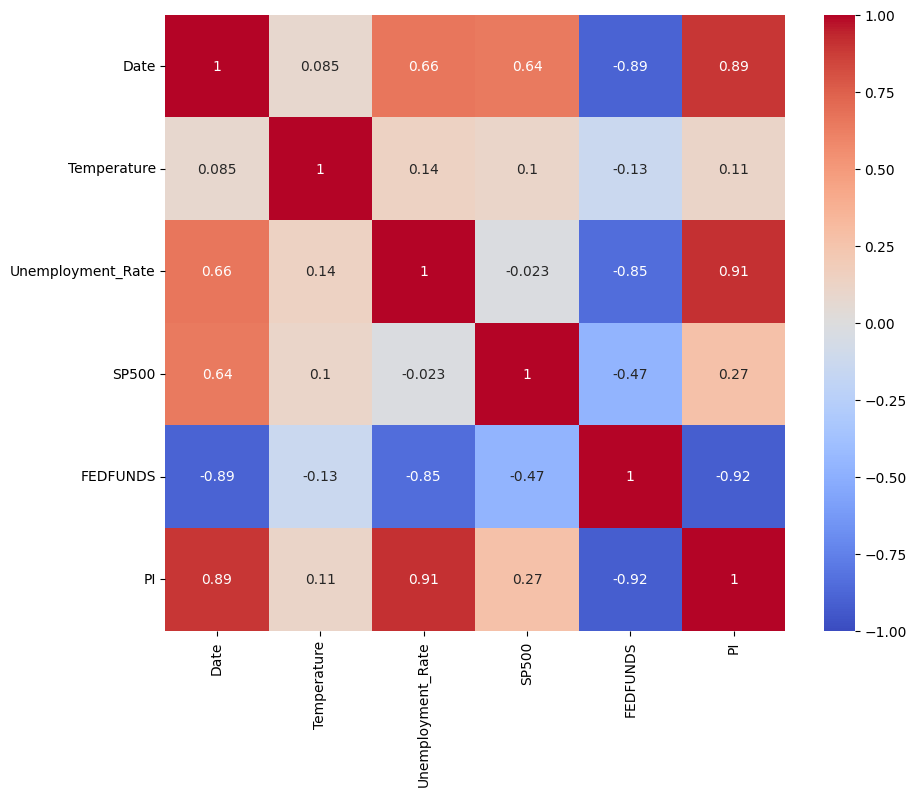

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_cleaned.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)


In [78]:
# Converting date column to datetime
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
# Drop the Date column for the regression
data = data_cleaned.drop(columns=['Date']).copy()

# Drop the extra index column if it exists
data = data_cleaned.copy()
data=data.drop('Date',axis=1)

In [79]:
print(data.columns)


Index(['Temperature', 'Unemployment_Rate', 'SP500', 'FEDFUNDS', 'PI'], dtype='object')


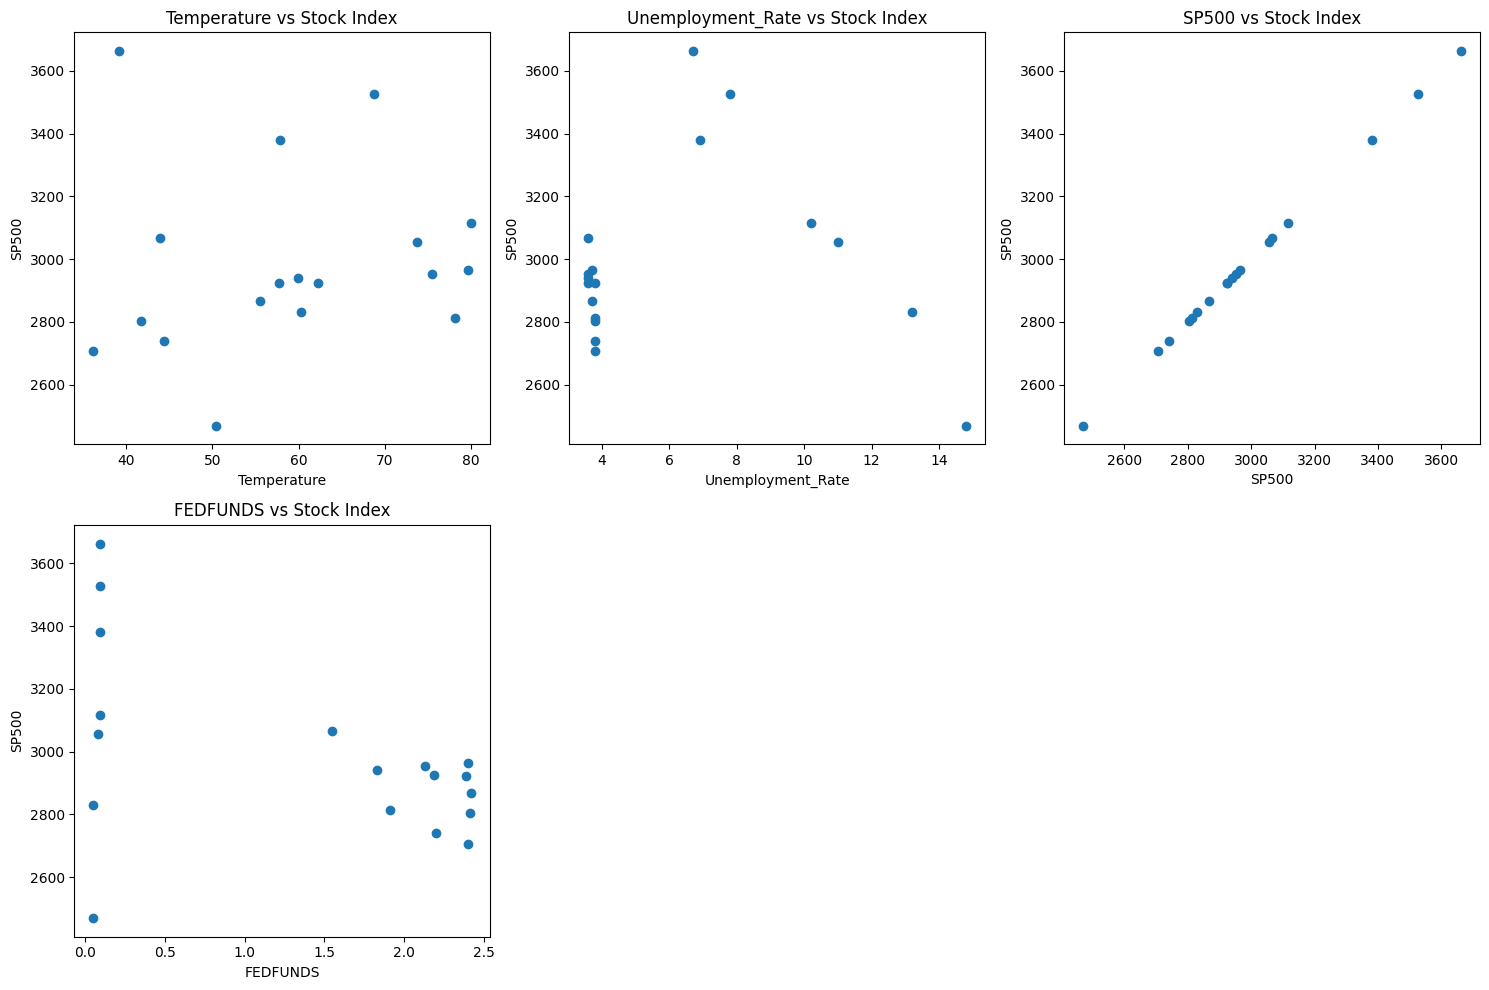

Index(['Temperature', 'Unemployment_Rate', 'SP500', 'FEDFUNDS', 'PI'], dtype='object')

Top Model 1:
Features: ('PI',)
R2 Score: -0.3127
Test Case 1 Prediction: 2916.14
Test Case 2 Prediction: 2880.14

Top Model 2:
Features: ('FEDFUNDS',)
R2 Score: -0.5380
Test Case 1 Prediction: 2897.82
Test Case 2 Prediction: 2963.74

Regression Equation for Model 1:
Stock_Index = 1620.19 + 0.07 * PI

Regression Equation for Model 2:
Stock_Index = 3161.50 + -131.84 * FEDFUNDS


In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from itertools import combinations



data.columns = ['Temperature', 'Unemployment_Rate', 'SP500', 'FEDFUNDS', 'PI']
data = data.apply(pd.to_numeric, errors = 'coerce')

# Step 2: Examine relationships between variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i+1)
    plt.scatter(data[column], data['SP500'])
    plt.xlabel(column)
    plt.ylabel('SP500')
    plt.title(f'{column} vs Stock Index')
plt.tight_layout()
plt.show()

# Step 3: Function to perform Multiple Linear Regression
def perform_mlr(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return model, r2

# Step 4: Fit regression models for all combinations of independent variables
X = data.drop('SP500', axis=1)
y = data['SP500']

print(data.columns)

results = []
for r in range(1, len(X.columns) + 1):
    for combo in combinations(X.columns, r):
        X_subset = X[list(combo)]
        model, r2 = perform_mlr(X_subset, y)
        results.append({
            'features': combo,
            'r2': r2,
            'model': model
        })

# Sort results by R2 score
results.sort(key=lambda x: x['r2'], reverse=True)

# Step 5: Predict stock index price using top 2 models
test_cases = [
    {'Unemployment_Rate': 4.0, 'FEDFUNDS': 2.0, 'Temperature': 60, 'PI': 18000},
    {'Unemployment_Rate': 5.5, 'FEDFUNDS': 1.5, 'Temperature': 55, 'PI': 17500}
]

for i, result in enumerate(results[:2]):
    model = result['model']
    features = result['features']

    print(f"\nTop Model {i+1}:")
    print(f"Features: {features}")
    print(f"R2 Score: {result['r2']:.4f}")

    for j, case in enumerate(test_cases):
        X_test = pd.DataFrame([case])[list(features)]
        prediction = model.predict(X_test)
        print(f"Test Case {j+1} Prediction: {prediction[0]:.2f}")

# Step 6: Print regression equations for top 2 models
for i, result in enumerate(results[:2]):
    model = result['model']
    features = result['features']
    coefficients = model.coef_
    intercept = model.intercept_

    print(f"\nRegression Equation for Model {i+1}:")
    equation = f"Stock_Index = {intercept:.2f}"
    for feature, coef in zip(features, coefficients):
        equation += f" + {coef:.2f} * {feature}"
    print(equation)


Observation:Due to lack of Data and the quality of data,  R² scores for both models are negative. This indicates that the models are performing poorly in terms of explaining the variance in the stock index prices.